In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


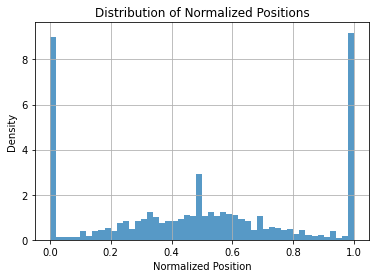

309


In [6]:

folder_path = 'null_elections'
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

all_positions = []
total = 0
for file in csv_files:
    df = pd.read_csv(file)
    if len(df["candidate"]) > 2:
        # Step 2: Normalize the 'position' column to the range 0 to 1
        min_position = df['position'].min()
        max_position = df['position'].max()
        df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
        all_positions.extend(df['normalized_position'].values)
        total += 1

# Step 3: Aggregate the normalized positions from all files
all_positions = np.array(all_positions)

# Step 4: Find the distribution of these normalized positions
plt.hist(all_positions, bins=50, density=True, alpha=0.75)
plt.xlabel('Normalized Position')
plt.ylabel('Density')
plt.title('Distribution of Normalized Positions')
plt.grid(True)
plt.show()
print(total)


Total number of files at level FEDERAL: 13


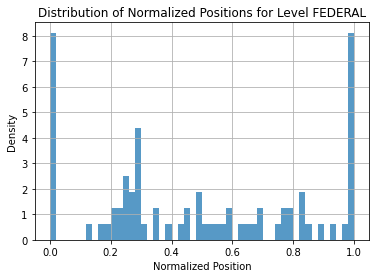

Total number of files at level STATE: 29


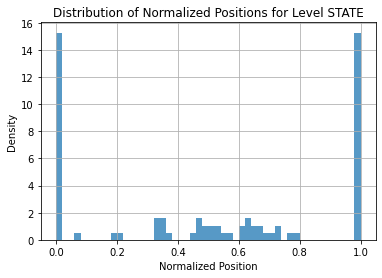

Total number of files at level LOCAL: 266


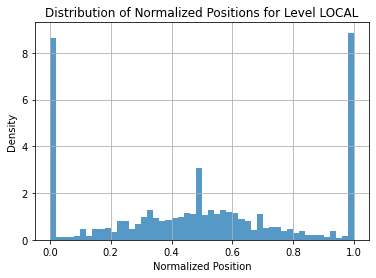

In [7]:


all_positions = []

for file in csv_files:
    df = pd.read_csv(file)
    if len(df["candidate"]) > 2:
        min_position = df['position'].min()
        max_position = df['position'].max()
        df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
        df['filename'] = os.path.basename(file)  # Add filename to the DataFrame
        all_positions.append(df)

# Combine all positions into a single DataFrame
all_positions_df = pd.concat(all_positions, ignore_index=True)

# Step 2: Load the additional file containing filenames and levels
additional_file = 'permissive.csv'
filename_level_df = pd.read_csv(additional_file)

# Step 3: Merge the normalized positions DataFrame with the filename-level file
merged_df = pd.merge(all_positions_df, filename_level_df, on='filename')

# Step 4: Plot the distribution for each level
levels = merged_df['level'].unique()

for level in levels:
    subset = merged_df[merged_df['level'] == level]
    num_files = subset['filename'].nunique()
    print(f"Total number of files at level {level}: {num_files}")
    if not subset.empty:
        plt.figure()
        plt.hist(subset['normalized_position'], bins=50, density=True, alpha=0.75)
        plt.xlabel('Normalized Position')
        plt.ylabel('Density')
        plt.title(f'Distribution of Normalized Positions for Level {level}')
        plt.grid(True)
        plt.show()


In [20]:

filename = "Alaska_08162022_HouseofRepresentativesSpecial.csv"
file = "null_elections/Alaska_08162022_HouseofRepresentativesSpecial.csv"
winners = pd.read_csv("diff.csv")
df = pd.read_csv(file)
winner = (winners.loc[winners["filename"]==filename, "IRV1"]).tolist()[0]
winner_position = df.loc[df["candidate"]==winner, "position"]
print(winner)
print(winner_position.tolist()[0])


Peltola, Mary S.
0.0


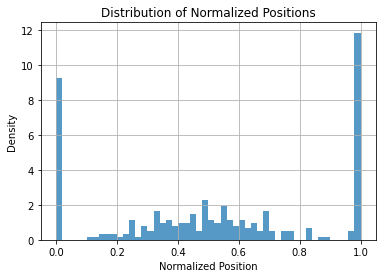

308


In [24]:

directory = 'null_elections'
#csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
winners = pd.read_csv("diff.csv")
all_positions = []
total = 0
for filename in os.listdir(directory):
    file = os.path.join(directory, filename)
    df = pd.read_csv(file)
    if len(df["candidate"]) > 2:
        try:
            winner = (winners.loc[winners["filename"]==filename, "IRV1"]).tolist()[0]
            # Step 2: Normalize the 'position' column to the range 0 to 1
            min_position = df['position'].min()
            max_position = df['position'].max()
            df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
            winner_position = df.loc[df["candidate"]==winner, "normalized_position"]
            all_positions.append(winner_position.tolist()[0])
            total += 1
        except:
            continue

# Step 3: Aggregate the normalized positions from all files
all_positions = np.array(all_positions)

# Step 4: Find the distribution of these normalized positions
plt.hist(all_positions, bins=50, density=True, alpha=0.75)
plt.xlabel('Normalized Position')
plt.ylabel('Density')
plt.title('Distribution of Normalized Positions')
plt.grid(True)
plt.show()
print(total)


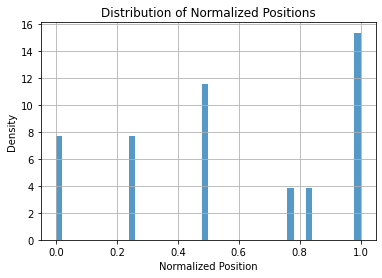

13


In [26]:

directory = 'null_elections'
#csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
winners = pd.read_csv("diff.csv")
all_positions = []
total = 0
for filename in os.listdir(directory):
    file = os.path.join(directory, filename)
    df = pd.read_csv(file)
    if len(df["candidate"]) > 2:
        try:
            if winners.loc[winners["filename"]==filename, "level"].tolist()[0] == "FEDERAL":
                winner = (winners.loc[winners["filename"]==filename, "IRV1"]).tolist()[0]
                # Step 2: Normalize the 'position' column to the range 0 to 1
                min_position = df['position'].min()
                max_position = df['position'].max()
                df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
                winner_position = df.loc[df["candidate"]==winner, "normalized_position"]
                all_positions.append(winner_position.tolist()[0])
                total += 1
        except:
            continue

# Step 3: Aggregate the normalized positions from all files
all_positions = np.array(all_positions)

# Step 4: Find the distribution of these normalized positions
plt.hist(all_positions, bins=50, density=True, alpha=0.75)
plt.xlabel('Normalized Position')
plt.ylabel('Density')
plt.title('Distribution of Normalized Positions')
plt.grid(True)
plt.show()
print(total)


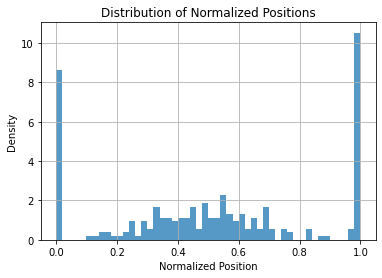

266


In [27]:

directory = 'null_elections'
#csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
winners = pd.read_csv("diff.csv")
all_positions = []
total = 0
for filename in os.listdir(directory):
    file = os.path.join(directory, filename)
    df = pd.read_csv(file)
    if len(df["candidate"]) > 2:
        try:
            if winners.loc[winners["filename"]==filename, "level"].tolist()[0] == "LOCAL":
                winner = (winners.loc[winners["filename"]==filename, "IRV1"]).tolist()[0]
                # Step 2: Normalize the 'position' column to the range 0 to 1
                min_position = df['position'].min()
                max_position = df['position'].max()
                df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
                winner_position = df.loc[df["candidate"]==winner, "normalized_position"]
                all_positions.append(winner_position.tolist()[0])
                total += 1
        except:
            continue

# Step 3: Aggregate the normalized positions from all files
all_positions = np.array(all_positions)

# Step 4: Find the distribution of these normalized positions
plt.hist(all_positions, bins=50, density=True, alpha=0.75)
plt.xlabel('Normalized Position')
plt.ylabel('Density')
plt.title('Distribution of Normalized Positions')
plt.grid(True)
plt.show()
print(total)


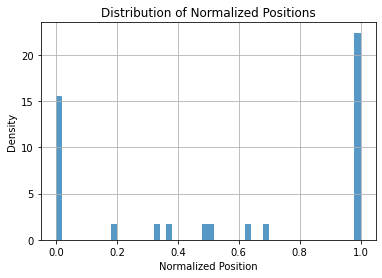

29


In [28]:

directory = 'null_elections'
#csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
winners = pd.read_csv("diff.csv")
all_positions = []
total = 0
for filename in os.listdir(directory):
    file = os.path.join(directory, filename)
    df = pd.read_csv(file)
    if len(df["candidate"]) > 2:
        try:
            if winners.loc[winners["filename"]==filename, "level"].tolist()[0] == "STATE":
                winner = (winners.loc[winners["filename"]==filename, "IRV1"]).tolist()[0]
                # Step 2: Normalize the 'position' column to the range 0 to 1
                min_position = df['position'].min()
                max_position = df['position'].max()
                df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
                winner_position = df.loc[df["candidate"]==winner, "normalized_position"]
                all_positions.append(winner_position.tolist()[0])
                total += 1
        except:
            continue

# Step 3: Aggregate the normalized positions from all files
all_positions = np.array(all_positions)

# Step 4: Find the distribution of these normalized positions
plt.hist(all_positions, bins=50, density=True, alpha=0.75)
plt.xlabel('Normalized Position')
plt.ylabel('Density')
plt.title('Distribution of Normalized Positions')
plt.grid(True)
plt.show()
print(total)


In [29]:
import seaborn as sns

c:\Users\mahsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


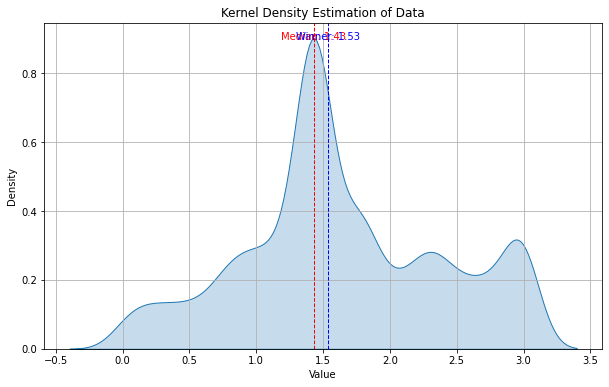

In [51]:
#median voter analysis

filename = "Berkeley_11082016_CityCouncilDistrict3.npy"
file = "np_data/Berkeley_11082016_CityCouncilDistrict3.npy"
winners = pd.read_csv("diff.csv")
winner = (winners.loc[winners["filename"]==(filename[0:-4]+".csv"), "IRV1"]).tolist()[0]
df = pd.read_csv("null_elections/Berkeley_11082016_CityCouncilDistrict3.csv")

distributed_points = np.load(file)
median_value = np.median(distributed_points)
df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
winner_position = (df.loc[df["candidate"]==winner, "position"]).tolist()[0]


plt.figure(figsize=(10, 6))
sns.kdeplot(distributed_points, fill=True)
plt.title('Kernel Density Estimation of Data')
#plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)
plt.text(median_value, plt.gca().get_ylim()[1]*0.95, f'Median: {median_value:.2f}', color='red', ha='center')

plt.axvline(winner_position, color='blue', linestyle='dashed', linewidth=1)
plt.text(winner_position, plt.gca().get_ylim()[1]*0.95, f'Winner: {winner_position:.2f}', color='blue', ha='center')

plt.show()

DEM Golden, Jared F.


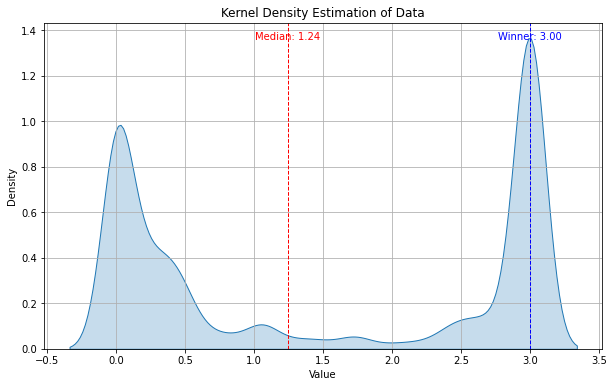

In [50]:
#median voter analysis

filename = "Maine_11062018_CongressionalDistrict2.npy"
file = "np_data/Maine_11062018_CongressionalDistrict2.npy"
winners = pd.read_csv("diff.csv")
winner = (winners.loc[winners["filename"]==(filename[0:-4]+".csv"), "IRV1"]).tolist()[0]

print(winner)
df = pd.read_csv("null_elections/Maine_11062018_CongressionalDistrict2.csv")

distributed_points = np.load(file)
median_value = np.median(distributed_points)
df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
winner_position = (df.loc[df["candidate"]==winner, "position"]).tolist()[0]


plt.figure(figsize=(10, 6))
sns.kdeplot(distributed_points, fill=True)
plt.title('Kernel Density Estimation of Data')
#plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)
plt.text(median_value, plt.gca().get_ylim()[1]*0.95, f'Median: {median_value:.2f}', color='red', ha='center')

plt.axvline(winner_position, color='blue', linestyle='dashed', linewidth=1)
plt.text(winner_position, plt.gca().get_ylim()[1]*0.95, f'Winner: {winner_position:.2f}', color='blue', ha='center')

plt.show()

In [54]:
def plot_median_and_winner(filename):

    #filename = "Maine_11062018_CongressionalDistrict2.npy"
    #file = "np_data/Maine_11062018_CongressionalDistrict2.npy"
    winners = pd.read_csv("diff.csv")
    winner = (winners.loc[winners["filename"]==(filename+".csv"), "IRV1"]).tolist()[0]

    df = pd.read_csv("null_elections/" + filename + ".csv")

    distributed_points = np.load("np_data/" +filename + ".npy")
    median_value = np.median(distributed_points)
    df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
    winner_position = (df.loc[df["candidate"]==winner, "position"]).tolist()[0]


    plt.figure(figsize=(10, 6))
    sns.kdeplot(distributed_points, fill=True)
    plt.title('Kernel Density Estimation of Data')
    #plt.xticks(normalized_points, normalized_names, rotation=45)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)

    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)
    plt.text(median_value, plt.gca().get_ylim()[1]*0.95, f'Median: {median_value:.2f}', color='red', ha='center')

    plt.axvline(winner_position, color='blue', linestyle='dashed', linewidth=1)
    plt.text(winner_position, plt.gca().get_ylim()[1]*0.95, f'Winner: {winner_position:.2f}', color='blue', ha='center')

    plt.show()


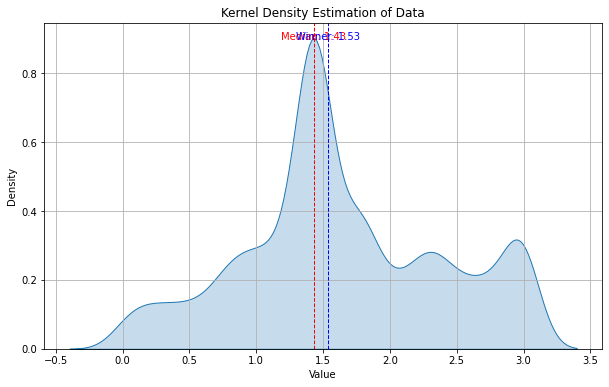

In [56]:
filename = "Berkeley_11082016_CityCouncilDistrict3"
plot_median_and_winner(filename)

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_median_and_winner_normalized(filename):
    # Load the winner's data
    winners = pd.read_csv("diff.csv")
    winner = winners.loc[winners["filename"] == (filename + ".csv"), "IRV1"].tolist()[0]
    print(winner)
    # Load the positions data
    df = pd.read_csv("null_elections/" + filename + ".csv")

    # Load the distributed points
    distributed_points = np.load("np_data/" + filename + ".npy")

    # Normalize the distributed points
    min_position = np.min(distributed_points)
    max_position = np.max(distributed_points)
    normalized_points = (distributed_points - min_position) / (max_position - min_position)

    # Calculate the median of the normalized points
    median_value = np.median(normalized_points)

    # Normalize the positions in the dataframe
    df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)

    # Get the winner's normalized position
    winner_position = df.loc[df["candidate"] == winner, "normalized_position"].tolist()[0]

    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.kdeplot(normalized_points, fill=True)
    plt.title('Kernel Density Estimation of Normalized Data')
    plt.xlabel('Normalized Value')
    plt.ylabel('Density')
    plt.grid(True)

    # Mark the median on the x-axis
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)
    plt.text(median_value, plt.gca().get_ylim()[1] * 0.95, f'Median: {median_value:.2f}', color='red', ha='center')

    # Mark the winner on the x-axis
    plt.axvline(winner_position, color='blue', linestyle='dashed', linewidth=1)
    plt.text(winner_position, plt.gca().get_ylim()[1] * 0.90, f'Winner: {winner_position:.2f}', color='blue', ha='center')

    plt.show()

# Example usage:
# plot_median_and_winner("Alaska_08162022_HouseofRepresentativesSpecial")


Murkowski, Lisa


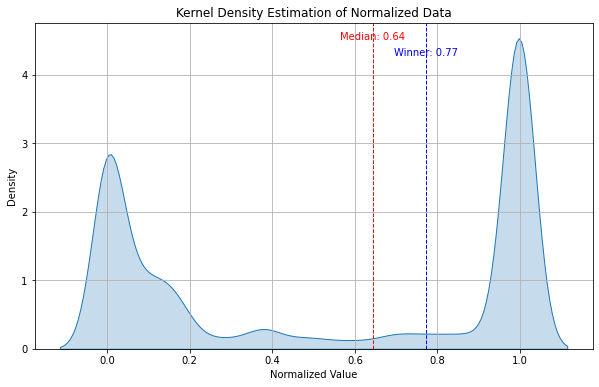

In [69]:
filename = "Alaska_11082022_USSenator"
plot_median_and_winner_normalized(filename)